# Taxpayer's Political Party
We are going to build a machine learning model that would predict the political party to which a taxpayer belongs to.


## **Data**
The dataset contains information about US taxpayers. There are 10 independent columns and 1 dependent column. This dataset includes attributes like household income, household debt level, if the taxpayer is married or not, how many cars their household has, if they filed their taxes in the last three years or not. Some of the attribute informations are given below:
- HHI: Household income
- HHDL: Household debt level
- Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
- PoliticalParty: Name of the political party
- CollegeGrads: Grade in College out of 5
- AHHAge: Average household age
- cars: number of cars in house
- Filed in YYYY: Tax filed in given year YYYY

https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv"

In [1]:
!pip install scikit-learn==0.23.1

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")

In [90]:
data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [92]:
data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [93]:
data.PoliticalParty.value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

Republican Party has least count of taxpayers

In [94]:
data.groupby("PoliticalParty").sum()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
PoliticalParty,,,,,,,,,,
Democrat,138095,39207768,-3973161,251,714,15937,636,125,138,125
Independent,129216,42692746,-6328472,262,689,16390,638,135,142,153
Republican,135989,42887845,-2025423,267,691,16302,682,147,129,137


In [95]:
data["Filed in 2015"].value_counts()

1    415
0    388
Name: Filed in 2015, dtype: int64

In [96]:
data["Filed in 2016"].value_counts()

1    409
0    394
Name: Filed in 2016, dtype: int64

In [97]:
data["Filed in 2017"].value_counts()

1    407
0    396
Name: Filed in 2017, dtype: int64

The count of people who filed tax in 2015 is more than the count of people who filed tax in the other two years individually.

Text(0.5, 1.0, 'Scatterplot between HHI and HHDL')

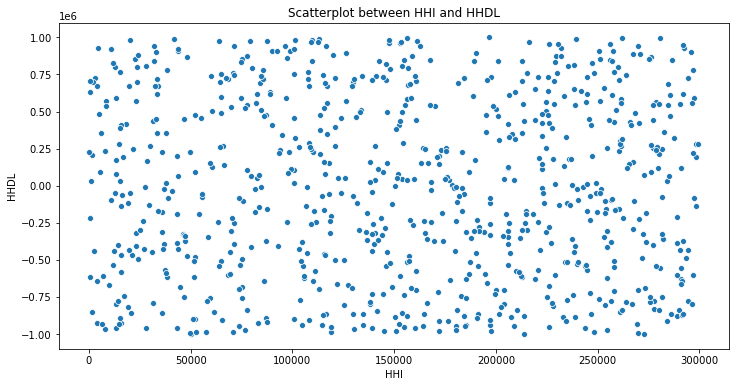

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(data.HHI, data.HHDL)
plt.xlabel("HHI")
plt.ylabel("HHDL")
plt.title("Scatterplot between HHI and HHDL")

Separate dependent feature (i.e. PoliticalParty) and independent features

In [99]:
corr_matrix = data.corr()
corr_matrix

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
Unnamed: 0,1.000000,-0.044713,0.042304,0.000487,0.045215,0.047690,0.041287,0.055262,0.012946,-0.017110
HHI,-0.044713,1.000000,-0.013745,-0.007374,-0.029947,0.029051,0.025449,0.061525,0.040308,0.027026
HHDL,0.042304,-0.013745,1.000000,-0.039531,0.015394,0.051930,0.016308,0.035499,0.022683,0.029971
Married,0.000487,-0.007374,-0.039531,1.000000,-0.012980,0.029995,-0.020007,-0.056867,0.054926,-0.028267
CollegGrads,0.045215,-0.029947,0.015394,-0.012980,1.000000,0.036692,-0.000744,-0.046625,0.034875,0.032438
AHHAge,0.047690,0.029051,0.051930,0.029995,0.036692,1.000000,0.069374,0.014954,-0.006631,0.016506
Cars,0.041287,0.025449,0.016308,-0.020007,-0.000744,0.069374,1.000000,-0.009360,0.063988,0.036764
Filed in 2017,0.055262,0.061525,0.035499,-0.056867,-0.046625,0.014954,-0.009360,1.000000,-0.086207,0.008262
Filed in 2016,0.012946,0.040308,0.022683,0.054926,0.034875,-0.006631,0.063988,-0.086207,1.000000,-0.051725
Filed in 2015,-0.017110,0.027026,0.029971,-0.028267,0.032438,0.016506,0.036764,0.008262,-0.051725,1.000000


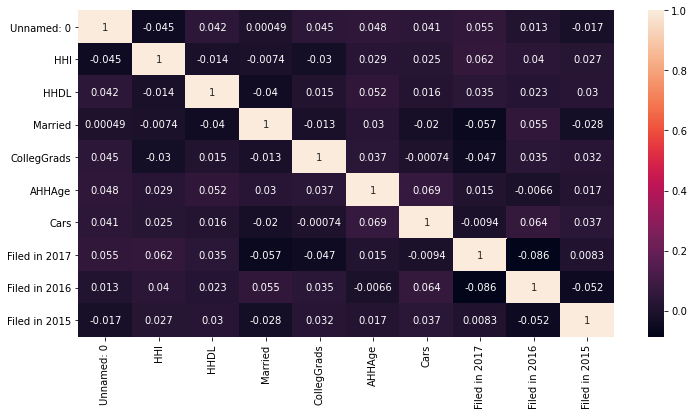

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)

In [28]:
X = data.drop("PoliticalParty", axis=1)
y = data["PoliticalParty"]

Split the data into train and test set with test_size = 0.2 and random_state = 1

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

Build a Logistic Regression model without passing any parameter to the model

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred=logreg.predict(X_test)

In [46]:
logreg.score(X_train, y_train)

0.37383177570093457

In [47]:
logreg.score(X_test, y_test)

0.35403726708074534

## Model Evaluation

### Model accuracy

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy_score(y_test,y_pred)

0.35403726708074534

In [42]:
confusion_matrix(y_test,y_pred)

array([[23, 19, 13],
       [ 9, 19, 27],
       [14, 22, 15]], dtype=int64)

## Load Test Dataset

In [51]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [52]:
test_data.isnull().sum()

Unnamed: 0       0
HHI              0
HHDL             0
Married          0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

In [54]:
target = logreg.predict(test_data)

In [55]:
res = pd.DataFrame(target)
res.index = test_data.index
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index=False)